<h1 align="center"><b>SMS Classification</b>

##### **The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.**


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
file = open('spam.csv', "r", encoding="ISO-8859-1")
data = pd.read_csv(file)
data = data.drop(data.columns[2:], axis=1)

In [3]:
data['Class'] = data['v1'].map({'spam': 1, 'ham': 0})
data = data.rename(columns={"v2":"Text"})
data = data.drop(["v1"], axis=1)
data["Length"] = data["Text"].apply(len)
data.head()

,Text,Class,Length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [4]:
total_stop_words = (
    stopwords.words("english")
    + stopwords.words("spanish")
    + stopwords.words("french")
    + ["ur","im","dont","doin","ure","2","4","r","u","n","lt","gt","amp","ok","pls","v","c","n","b","wk","th","nd","st","rd","th","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","ab","ac","ad","ae","af","ag","ah","ai","aj","ak","al","am","an","ao","ap","aq","ar","as","at","au","av","aw","ax","ay","az","ba","bb","bc","bd","be","bf","bg","bh","bi","bj","bk","bl","bm","bn","bo","bp","bq","br","bs","bt","bu","bv","bw","bx","by","bz","ca","cb","cc","cd","ce","cf","cg","ch","ci","cj","ck","cl","cm","cn","co","cp","cq","cr","cs","ct","cu","cv","cw","cx","cy","cz","da","db","dc","dd","de","df","dg","dh","di","dj","dk","dl","dm","dn","do","dp","dq","dr","ds","dt","du","dv","dw","dx","dy","dz","ea","eb","ec","ed","ee","ef","eg","eh","ei","ej","ek","el","em","en","eo","ep","eq","er","es","et","eu","ev","ew","ex","ey","ez","fa","fb","fc","fd","fe","ff","fg","fh","fi","fj","fk","fl","fm","fn","fo","fp","fq","fr","fs","ft","fu","fv","fw","fx","fy","fz","ga","gb","gc","gd","ge","gf","gg","gh","gi","gj","gk","gl","gm","gn","go","gp","gq","gr","gs","gt","gu","gv","gw","gx","gy","gz","ha","hb","hc","hd","he","hf","hg","hh","hi","hj","hk","hl","hm","hn","ho","hp","hq","hr","hs","ht"]
)
total_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [5]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = text.lower()
    text = [word for word in text.split() if word not in total_stop_words]
    text = " ".join(text)
    return text

data['Text'] = data['Text'].apply(clean_text)

In [6]:
data

,Text,Class,Length
0,jurong point crazy available bugis great world...,0,111
1,lar joking wif oni,0,29
2,free entry wkly comp win cup final tkts 21st m...,1,155
3,dun say early hor already say,0,49
4,nah think goes usf lives around though,0,61
...,...,...,...
5567,2nd time tried contact å750 pound prize claim ...,1,161
5568,ì_ going esplanade home,0,37
5569,pity mood soany suggestions,0,57
5570,guy bitching acted like id interested buying s...,0,125


In [7]:
data['Text'].describe().to_frame()

,Text
count,5572
unique,5096
top,
freq,31


<Axes: xlabel='Class', ylabel='count'>

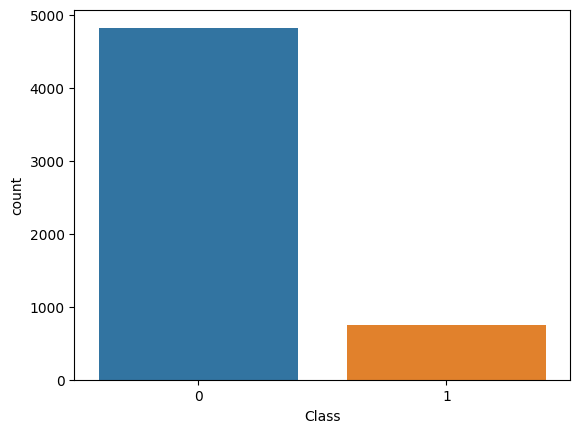

In [8]:
sns.barplot(x=data["Class"].value_counts().index, y=data["Class"].value_counts())

In [9]:
Percent_of_Spam = (data["Class"].value_counts()[1]/data["Class"].value_counts().sum())*100
Percent_of_Ham = 100-Percent_of_Spam
print(f"Percentage of spam is {Percent_of_Spam:0.2f}%", f"Percentage of ham is {Percent_of_Ham:0.2f}%")

Percentage of spam is 13.41% Percentage of ham is 86.59%


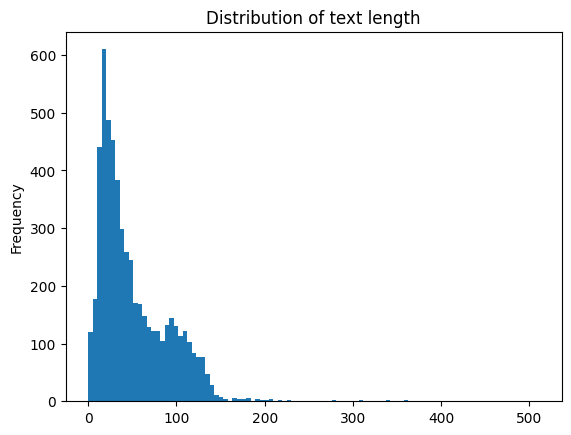

In [10]:
data['Text'].str.len().plot(kind='hist', bins=100, title='Distribution of text length')
plt.show()

In [11]:
Largest_Text = data[data["Text"] == max(data["Text"], key=len)]
str(Largest_Text.Text.values[0])

'love start attractioni feel need every time around meshe first thing comes thoughtsi would start day end hershe every time dreamlove every breath namemy life happen around hermy life named heri would cry herwill give happiness take sorrowsi ready fight anyone heri love craziest things herlove proove anyone girl beautiful lady whole planeti always singing praises herlove start making chicken curry end makiing sambarlife beautiful thenwill get every morning thank god day mei would like say lotwill tell later'

call 576
get 386
free 275
ltgt 258
know 257
like 242
got 238
ill 237
good 234
come 226
time 208
day 202
love 195
want 192
send 190
text 188
one 173
going 171
need 166
txt 163


<Axes: xlabel='word', ylabel='freq'>

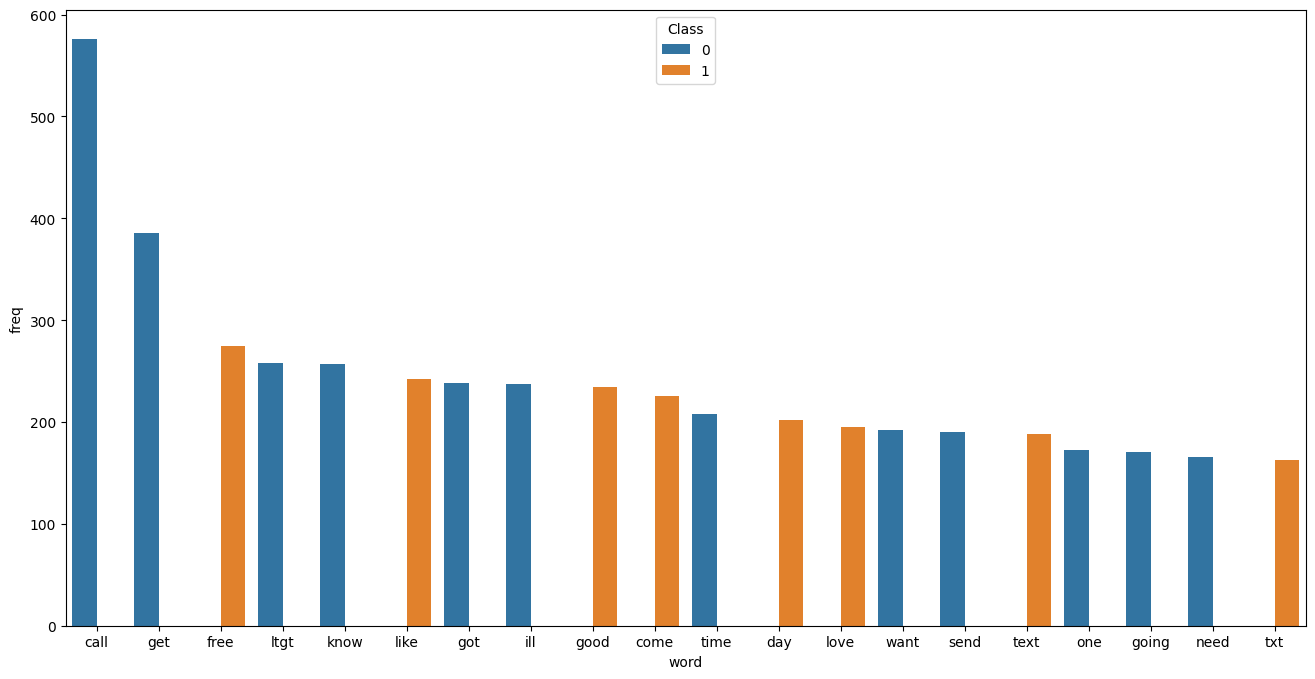

In [12]:
# Print each word with its frequency
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['Text'], 20)
for word, freq in common_words:
    print(word, freq)
# Plot the most common words
top_words = pd.DataFrame(common_words, columns=["word", "freq"])
fix,ax = plt.subplots(figsize=(16,8))
top_words["Class"] = data["Class"].astype(str)
sns.barplot(x="word", y="freq", data=top_words, hue="Class")

In [13]:
X = data["Text"]
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Seperate the data into training and testing sets
print(
    f"Head of X_Train: \n{X_train.head()}",
    f"Shape of X_train : \n{X_train}",
    f"Shape of X_Test : \n{X_test}",
    f"Shape of Y_Train : \n{y_train}n",
    f"Shape of Y_Test : \n{y_test}",
    sep="\n\n\n",
)

Head of X_Train: 
1978                     boat still moms check half naked
3989    bank granite issues strongbuy explosive pick m...
3935                    giving second chance rahul dengra
4078                   played smash bros ltgt religiously
4086    private 2003 account statement 07973788240 sho...
Name: Text, dtype: object


Shape of X_train : 
1978                     boat still moms check half naked
3989    bank granite issues strongbuy explosive pick m...
3935                    giving second chance rahul dengra
4078                   played smash bros ltgt religiously
4086    private 2003 account statement 07973788240 sho...
                              ...                        
3772        came hostel going sleep plz call class hrishi
5191                                 sorry ill call later
5226                   prabhaim sorydarealyfrm heart sory
5390                             nt joking seriously told
860                                        work going min
Name: 

In [14]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [15]:
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [16]:
# Convert X_train and X_test from csr_matrix to DataFrame
X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_score = logistic_model.score(X_test, y_test)
print(f"Logistic Regression Model Accuracy: {logistic_score:0.1%}")

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)
print(f"Support Vector Machine Model Accuracy: {svm_score:0.1%}")

# Naive Bayes
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
naive_score = naive_model.score(X_test, y_test)
print(f"Naive Bayes Model Accuracy: {naive_score:0.1%}")

# Predictions
logistic_predictions = logistic_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
naive_predictions = naive_model.predict(X_test)

# Confusion Matrix
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
naive_confusion_matrix = confusion_matrix(y_test, naive_predictions)

Logistic Regression Model Accuracy: 94.6%
Support Vector Machine Model Accuracy: 97.5%
Naive Bayes Model Accuracy: 88.3%


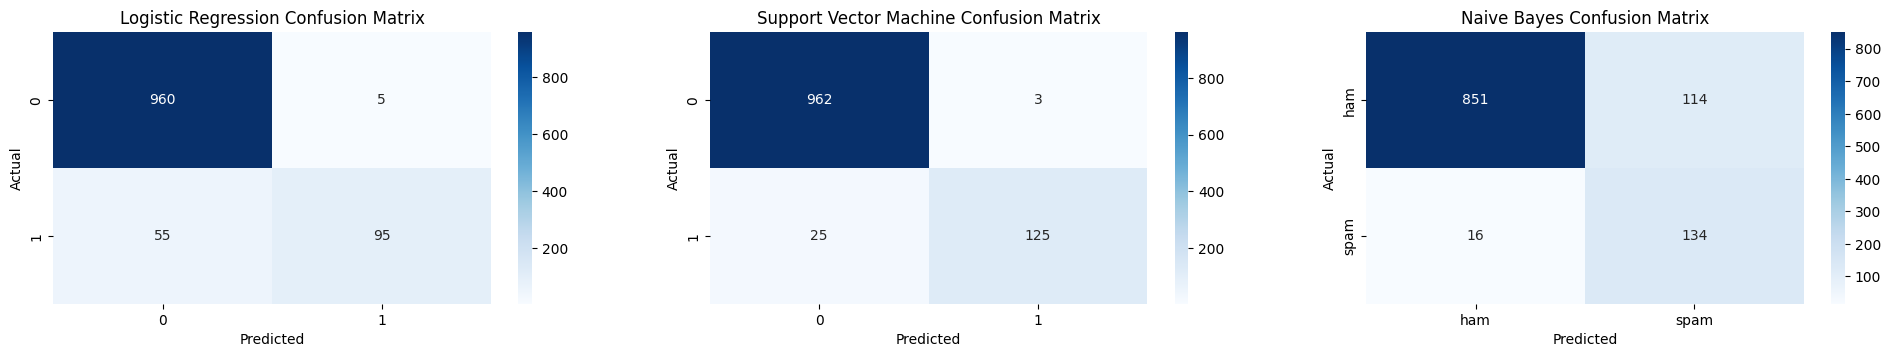

In [17]:
plt.figure(figsize=(24, 12))
# Add axis


plt.subplot(3, 3, 1)
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")



plt.subplot(3, 3, 2)
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.subplot(3, 3, 3)
sns.heatmap(naive_confusion_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=["ham","spam"],yticklabels=["ham","spam"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


In [18]:
def predict_text(text):
    text = clean_text(text)
    text = vectorizer.transform([text])
    text = tfidf_transformer.transform(text)
    text = pd.DataFrame(text.toarray())
    logistic_prediction = logistic_model.predict(text)
    svm_prediction = svm_model.predict(text)
    naive_prediction = naive_model.predict(text)
    logistic_prediction = "Spam" if logistic_prediction[0] == 1 else "Ham"
    svm_prediction = "Spam" if svm_prediction[0] == 1 else "Ham"
    naive_prediction = "Spam" if naive_prediction[0] == 1 else "Ham"
    return logistic_prediction, svm_prediction, naive_prediction

# Example 1
text = "Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim your prize.\n"
print(text)
logistic_prediction, svm_prediction, naive_prediction = predict_text(text)
print(f"Logistic Regression Prediction: {logistic_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}")
print(f"Naive Bayes Prediction: {naive_prediction}\n")
# Example 2
text = "Hello, how are you doing today?\n"
print(text)
logistic_prediction, svm_prediction, naive_prediction = predict_text(text)
print(f"Logistic Regression Prediction: {logistic_prediction}")
print(f"Support Vector Machine Prediction: {svm_prediction}")
print(f"Naive Bayes Prediction: {naive_prediction}")

Congratulations! You have won a free ticket to the Bahamas. Text 'WIN' to 12345 to claim your prize.

Logistic Regression Prediction: Spam
Support Vector Machine Prediction: Spam
Naive Bayes Prediction: Spam

Hello, how are you doing today?

Logistic Regression Prediction: Ham
Support Vector Machine Prediction: Ham
Naive Bayes Prediction: Spam


In [19]:
# Export SVM Model, Vectorizer and TfidfTransformer
import joblib
joblib.dump(svm_model, "spam_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(tfidf_transformer, "tfidf_transformer.pkl")
print("Model, Vectorizer and TfidfTransformer exported successfully")

Model, Vectorizer and TfidfTransformer exported successfully
